# Imports

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #=> maydorresh
import seaborn as sns
from sklearn.datasets import make_blobs , make_circles
# import kmeans clustering and dbsan clustering
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score , calinski_harabasz_score

# Topics for today

## The use of / in python functions
_This will make it such that function arguments must be all positional arguments._

In [4]:
def hi(a,b,c):
    print(a,b,c)

def hi_with_a_slash(a,b,c,/):
    print(a,b,c)

In [5]:
hi(1,2,3)
hi(b=2,c=1,a=3)
hi_with_a_slash(1,2,3)
try :
    hi_with_a_slash(a=1,b=2,c=3)
except TypeError as e:
    print(e)

1 2 3
3 2 1
1 2 3
hi_with_a_slash() got some positional-only arguments passed as keyword arguments: 'a, b, c'


## Definition of Tuple Immutability

In [8]:
my_tuple = ([1,2,3] , 5)

print("IDs before appending the list" , id(my_tuple[0]) , id(my_tuple[1]))

my_tuple[0].append(4)

# no change in ID of the object
print("IDs after appending the list",id(my_tuple[0]) , id(my_tuple[1]))

# assignment is prohibited 
try:
    my_tuple[1] = 6
except TypeError as e:
    print(e)

# ordering changing is also prohibited
try:
    my_tuple[0] , my_tuple[1] = my_tuple[1] , my_tuple[0]
except TypeError as e:
    print(e)



IDs before appending the list 1909575450688 140720756017720
IDs after appending the list 1909575450688 140720756017720
'tuple' object does not support item assignment
'tuple' object does not support item assignment


## Pivoting in pandas
_we aim to convert long data to wide data_

In [45]:
dates = ['2024-01-01','2024-01-02']
cities = ['NY','LA']
temperatures = [32,35,75,82]
df = pd.DataFrame({'date': np.random.choice(dates,4),'city':np.random.choice(cities,4),'temperature':temperatures})
df

,date,city,temperature
0,2024-01-01,NY,32
1,2024-01-02,LA,35
2,2024-01-02,NY,75
3,2024-01-02,LA,82


In [52]:
df.at[3,'date'] = '2024-01-01' # some cool edit to fill the na

In [53]:
pd.pivot_table(df,values='temperature',index='date',columns='city'
               #,aggfunc='max/mean/sum/median/std/var/count/first/last'
               )

city,LA,NY
date,,
2024-01-01,82.0,32.0
2024-01-02,35.0,75.0


In [54]:
pd.pivot_table(df,values='temperature',index='city',columns='date'
               #,aggfunc='max'
               )

date,2024-01-01,2024-01-02
city,,
LA,82.0,35.0
NY,32.0,75.0


## KMeans Vs DBSCAN with blobs and circles (using Matplotlib)

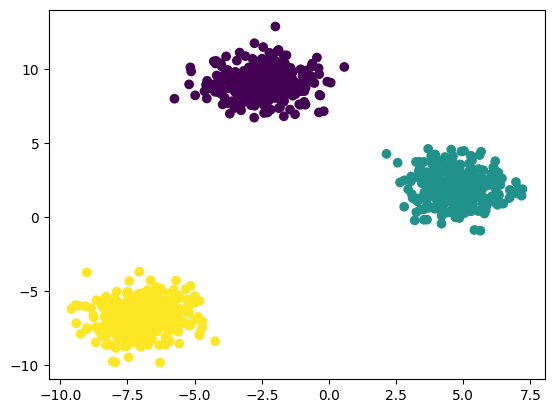

In [72]:
X = make_blobs(n_samples=1000, centers=3, random_state=42)
# plot the data and use the cluster label as cmap
plt.scatter(X[0][:,0],X[0][:,1],c=X[1])
plt.show()



### Kmeans with blobs

0.8435705873891368 16512.260779883072


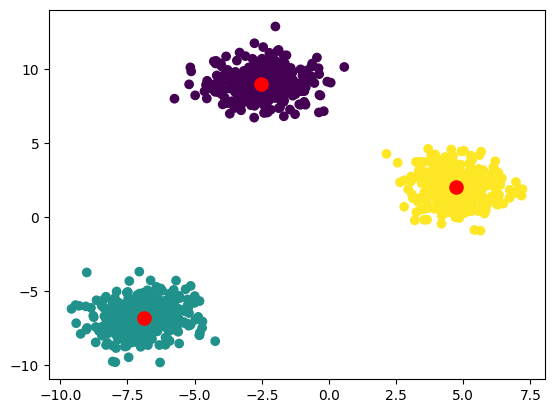

In [76]:
# apply Kmeans and get silhouette score and chi score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X[0])
print(silhouette_score(X[0],kmeans.labels_), calinski_harabasz_score(X[0],kmeans.labels_))
plt.scatter(X[0][:,0],X[0][:,1],c=kmeans.labels_)
# plot clusters centers with red color
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',s=90)
plt.show()


### Kmeans with circles

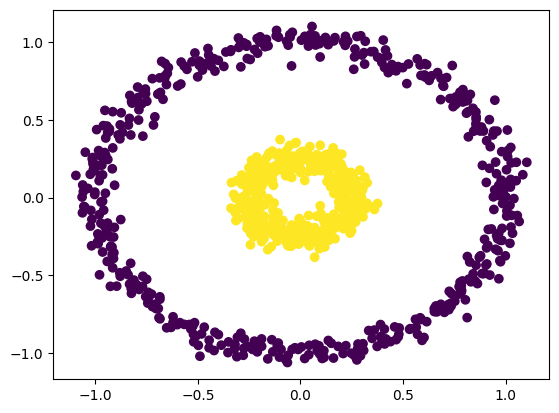

In [101]:
# factor [0,1] : 0 means the two circles are far from each other and 1 means they are close from each other
Y = make_circles(n_samples=1000, factor=0.25, noise=0.05)
plt.scatter(Y[0][:,0],Y[0][:,1],c=Y[1])
plt.show()


0.2741992193617344 423.32521390994555


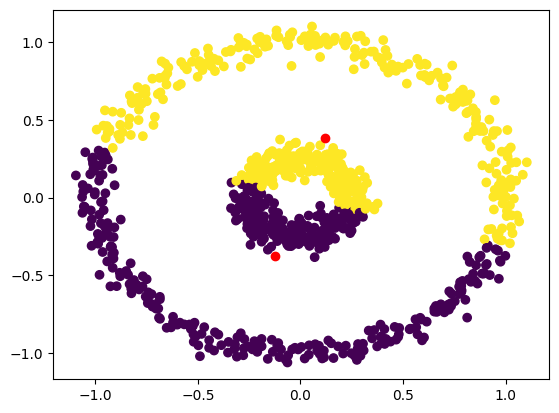

In [102]:
# apply Kmeans and get silhouette score and chi score
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(Y[0])
print(silhouette_score(Y[0],kmeans.labels_), calinski_harabasz_score(Y[0],kmeans.labels_))
plt.scatter(Y[0][:,0],Y[0][:,1],c=kmeans.labels_)
# plot clusters centers with red color
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.show()


### DBSCAN with blobs

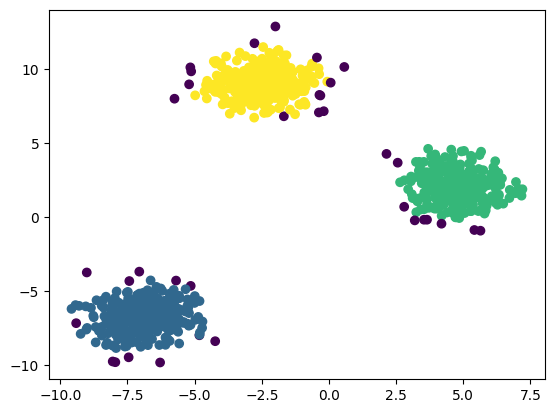

0.7807246227356389 4952.63851773746


In [103]:
dbscan = DBSCAN(eps=0.5, min_samples=5,algorithm='ball_tree') # radius , min_samples (for assigning core points)
dbscan.fit(X[0])
plt.scatter(X[0][:,0],X[0][:,1],c=dbscan.labels_)
plt.show()
print(silhouette_score(X[0],dbscan.labels_), calinski_harabasz_score(X[0],dbscan.labels_) )

### DBSCAN with circles

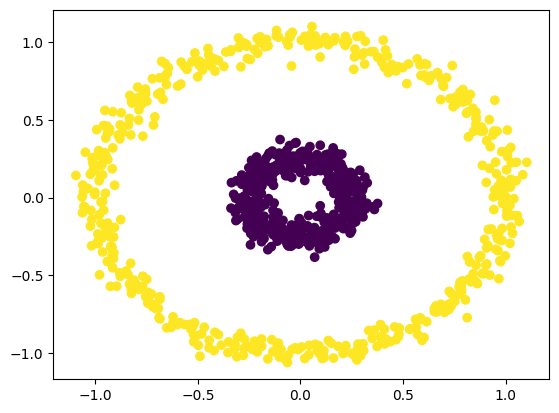

0.23362622485520626 0.011073040362919406


In [106]:
dbscan = DBSCAN(eps=0.4, min_samples=5) # radius , min_samples (for assigning core points)
dbscan.fit(Y[0])
plt.scatter(Y[0][:,0],Y[0][:,1],c=dbscan.labels_)
plt.show()
print(silhouette_score(Y[0],dbscan.labels_), calinski_harabasz_score(Y[0],dbscan.labels_) )

